# Khai báo thư viện

In [412]:
import pandas as pd
import numpy as np

# Đọc file dataset

In [413]:
df = pd.read_csv("D:\học\khai pha\Forestfire/forestfires.csv")
df
# Đây là tập dữ liệu về cháy rừng ở công viên tự nhiên Montesinho

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Tạo features gồm các cột cần phân cụm

In [414]:
features = ["X","Y","FFMC","DMC","DC","ISI","temp", "RH", "wind", "rain"]
#X - tọa độ không gian trục x trong bản đồ công viên Montesinho: 1 đến 9
#Y - tọa độ không gian trục y trong bản đồ công viên Montesinho: 2 đến 9
#Chỉ số FFMC từ hệ thống FWI: 18,7 đến 96,20
#Chỉ số DMC từ hệ thống FWI: 1,1 đến 291,3
#Chỉ số DC - DC từ hệ thống FWI: 7,9 đến 860,6
#Chỉ số ISI từ hệ thống FWI: 0,0 đến 56,10
#temp - nhiệt độ tính bằng độ C: 2,2 đến 33,30
#RH - độ ẩm tương đối tính bằng%: 15,0 đến 100
#wind - tốc độ gió tính bằng km / h: 0,40 đến 9,40
#mrain - mưa bên ngoài tính bằng mm# Bảng đồ công viên tự nhiên Montesinho khi được visualize / m2: 0,0 đến 6,4

# Bảng đồ công viên tự nhiên Montesinho khi được visualize

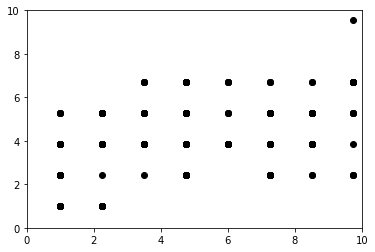

In [415]:
plt.scatter(data['X'], data['Y'], c='black')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

# Xử lý missing data (NaN)

In [416]:
df = df.dropna(subset=features)

# Gán các features vào data

In [417]:
data = df[features].copy()

In [418]:
data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


# MIN MAX normalization

In [419]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

# Các chỉ số thống kê data

In [420]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5.586557,4.285438,10.283185,4.782644,7.333295,2.608140,6.366292,4.445671,5.019557,1.033849
std,2.892222,1.757001,0.712272,2.206977,2.909185,0.812741,1.867082,1.919702,1.990725,0.462436
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.857143,10.225806,3.325982,6.040460,2.158645,5.276527,3.117647,3.555556,1.000000
50%,4.750000,3.857143,10.406452,4.694004,8.696728,2.497326,6.498392,4.176471,5.000000,1.000000
75%,8.500000,5.285714,10.574194,5.869056,9.279583,2.925134,7.623794,5.470588,6.000000,1.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


# THUẬT TOÁN KMEANS (Phân cụm các đám cháy ở công viên Montesinho)

# B1 Chọn ngẫu nhiên K điểm làm trung tâm (center) ban đầu.

In [421]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

# K = 3

In [422]:
centroids = random_centroids(data, 3)

In [423]:
centroids

,0,1,2
X,4.750000,1.000000,11.000000
Y,1.000000,6.714286,3.857143
FFMC,10.845161,10.845161,10.496774
DMC,10.483115,5.972433,5.135079
DC,9.029788,8.011845,8.227630
ISI,2.711230,3.121212,3.174688
temp,7.334405,4.536977,5.758842
RH,5.117647,2.529412,7.823529
wind,4.555556,4.000000,7.000000
rain,1.000000,1.000000,1.000000


# B2 Gán các đối tượng vào cụm có center gần nó nhất.

In [424]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [425]:
labels = get_labels(data, centroids)

In [426]:
labels.value_counts() #số lượng phần tử ở mỗi cụm

2    204
1    204
0    109
dtype: int64

# B3 Cập nhật lại center cho từng cụm

In [427]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

# visualize clusters

In [428]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [460]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], c="red")
    plt.show()

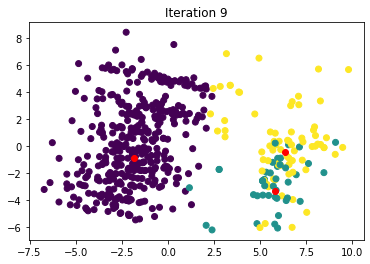

In [461]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

# data centroids 1

In [327]:
centroids

,0,1,2
X,2.408634,7.833517,5.406822
Y,2.891447,4.800030,4.185517
FFMC,10.398275,10.419732,9.560791
DMC,5.203996,5.178290,1.851980
DC,8.548233,8.468223,1.909463
ISI,2.653194,2.676009,1.931032
temp,6.863866,6.709904,3.733508
RH,4.040517,4.038749,4.118139
wind,4.408818,4.485595,5.360322
rain,1.002455,1.030034,1.002644


In [328]:
from sklearn.cluster import KMeans

In [329]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

# data centroids 2

In [330]:
pd.DataFrame(kmeans.cluster_centers_
             , columns=features).T

,0,1,2
X,2.961009,5.892857,8.371134
Y,3.496723,4.564626,5.020619
FFMC,10.425215,9.731674,10.422082
DMC,5.474500,2.003643,5.509297
DC,8.695808,2.156282,8.604214
ISI,2.745163,2.010101,2.777845
temp,6.988525,4.073343,6.908112
RH,4.318403,4.635854,4.485749
wind,4.741081,5.887831,4.862543
rain,1.002867,1.002976,1.085374


# Vì data centroids 1 khác với data centroids 2 nên ta cập nhật lại center và quay lại B2

# B2 Gán các đối tượng vào cụm có center gần nó nhất.

In [331]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [332]:
labels = get_labels(data, centroids)

In [333]:
labels.value_counts() #số lượng phần tử ở mỗi cụm

1    216
0    198
2    103
dtype: int64

# B3 Cập nhật lại center cho từng cụm

In [334]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

# Các cụm sau khi cập nhật lại tâm

In [350]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], c='red')
    plt.show()

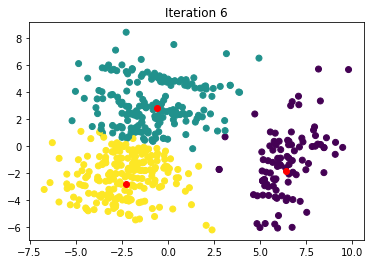

In [351]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [337]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

# data_centroids 3

In [229]:
pd.DataFrame(kmeans.cluster_centers_
             , columns=features).T

,0,1,2
X,8.371134,2.961009,5.892857
Y,5.020619,3.496723,4.564626
FFMC,10.422082,10.425215,9.731674
DMC,5.509297,5.474500,2.003643
DC,8.604214,8.695808,2.156282
ISI,2.777845,2.745163,2.010101
temp,6.908112,6.988525,4.073343
RH,4.485749,4.318403,4.635854
wind,4.862543,4.741081,5.887831
rain,1.085374,1.002867,1.002976


# Vì data_centroids 3 không thay đổi gì so với data_centroids 2 nên ta kết thúc thuật toán